# Atividade 6

In [2]:
import numpy as np

from src.utils import *
from src.transform import *
from src.conversion import *
from src.filter import *

## Clarear e Escurecer

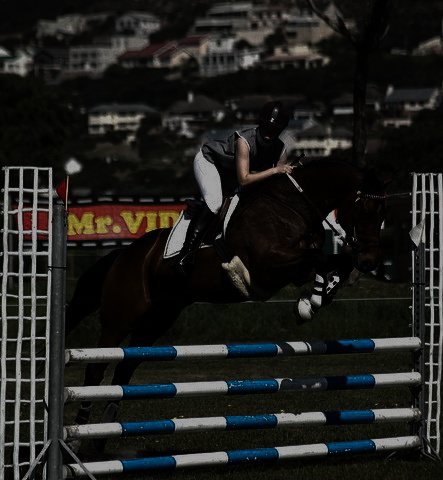

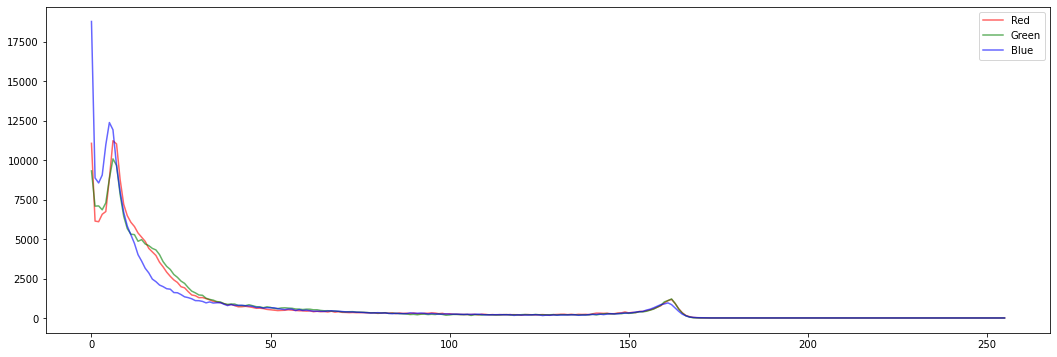

In [2]:
img1a, im_array1a = open_img("data/cores/Image_(1a).jpg")
display(img1a)
plot_histogram_rgb(im_array1a)

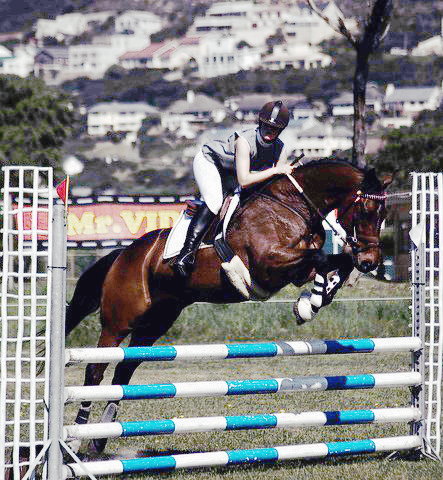

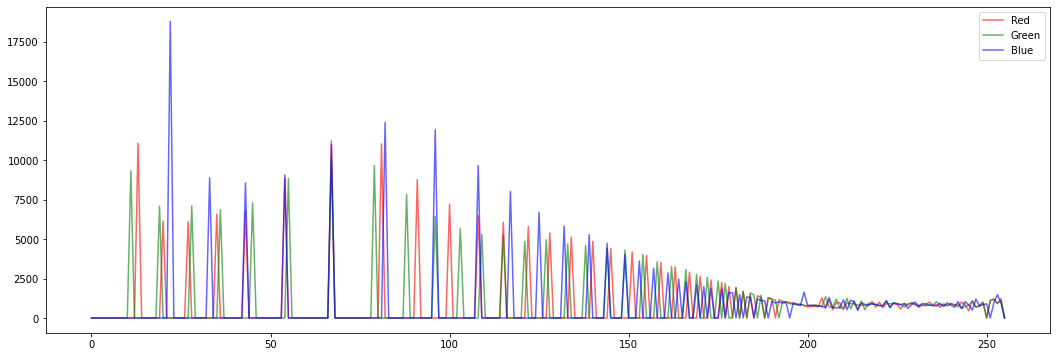

In [3]:
im_clarear1a = eq_histogram_rgb(im_array1a)
display(Image.fromarray(im_clarear1a))
plot_histogram_rgb(im_clarear1a)

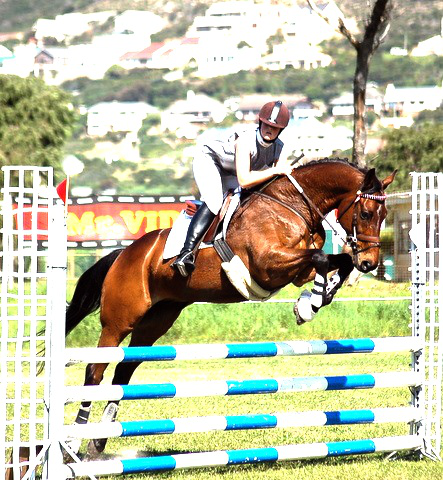

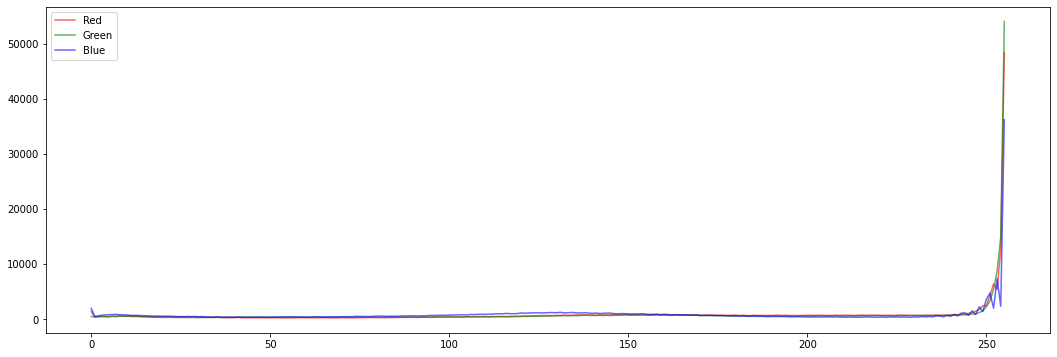

In [4]:
img1b, im_array1b = open_img("data/cores/Image_(1b).jpg")
display(img1b)
plot_histogram_rgb(im_array1b)

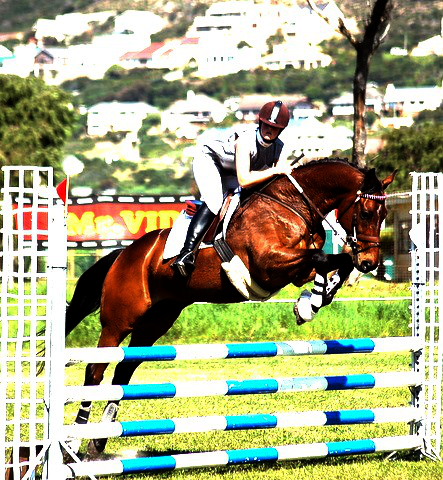

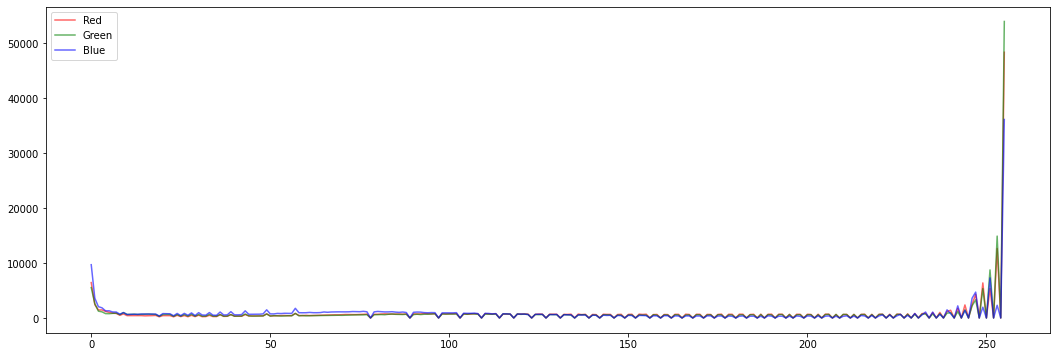

In [5]:
im_escurecer1b = gama(im_array1b, g=1.8)
display(Image.fromarray(im_escurecer1b))
plot_histogram_rgb(im_escurecer1b)

## Restauração

### HSI

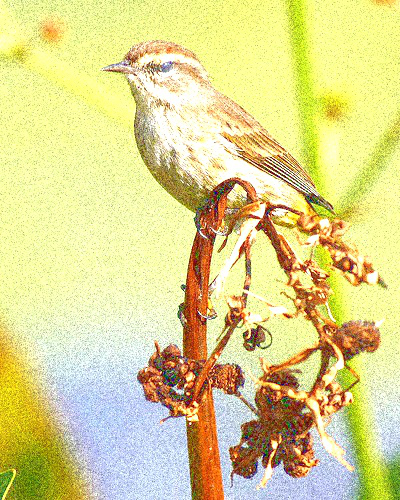

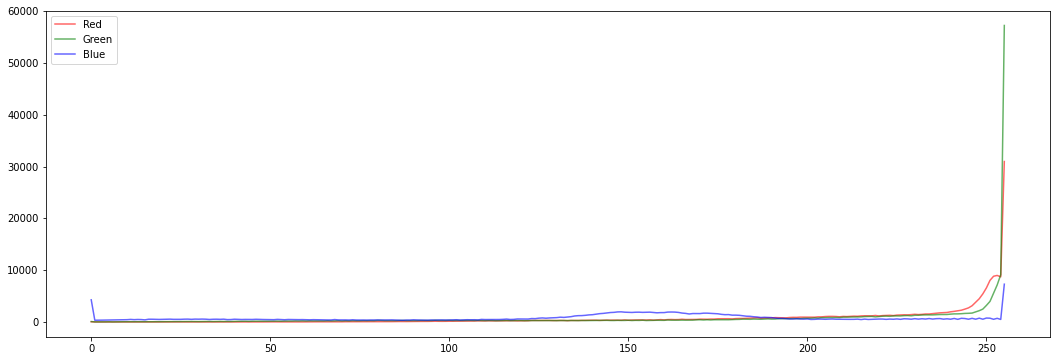

In [2]:
img2a, im_array2a = open_img("data/cores/Image_(2a).jpg")
display(img2a)
plot_histogram_rgb(im_array2a)

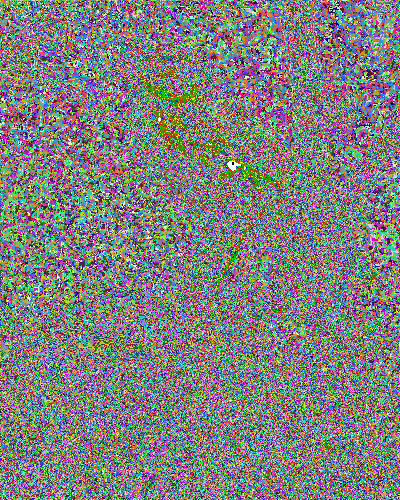

In [4]:
im_array2a_hsi = rgb2hsi(im_array2a)
plot_image(hsi2rgb(im_array2a_hsi))
im_array2a_fix = np.empty(im_array2a.shape)

im_array2a_fix[:,:,0] = median(im_array2a_hsi[:,:,0], (3,3))
im_array2a_fix[:,:,0] = arith_mean(im_array2a_fix[:,:,0], (3,3))
im_array2a_fix[:,:,1] = median(im_array2a_hsi[:,:,1], (5,5))
im_array2a_fix[:,:,2] = median(im_array2a_hsi[:,:,2], (3,3))
im_array2a_fix = hsi2rgb(im_array2a_fix)
plot_image(im_array2a_fix)

### RGB

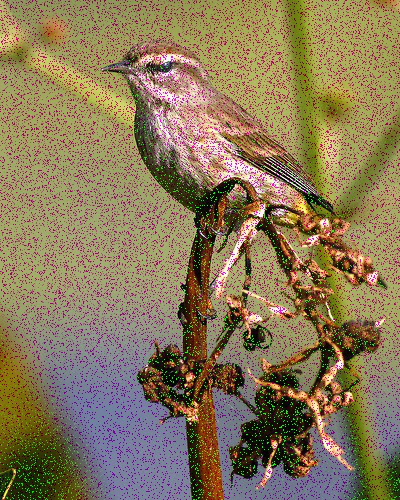

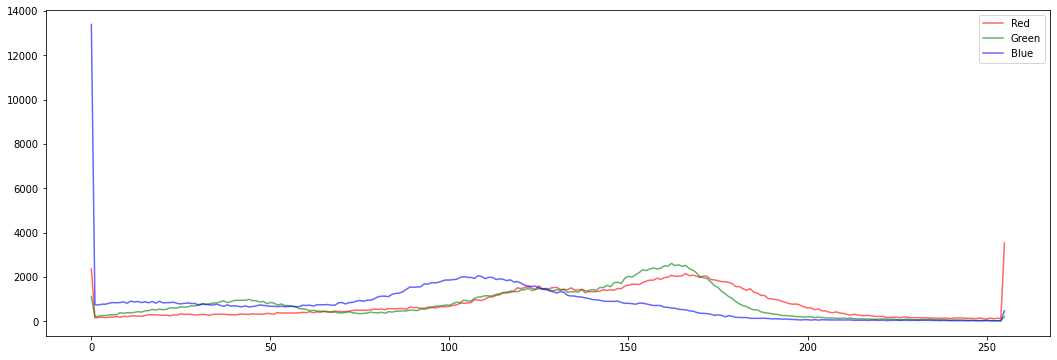

In [9]:
img2b, im_array2b = open_img("data/cores/Image_(2b).jpg")
display(img2b)
plot_histogram_rgb(im_array2b)

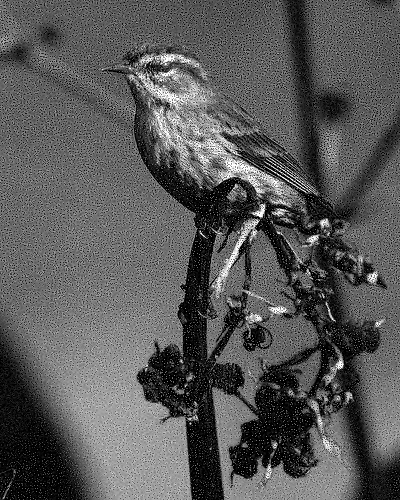

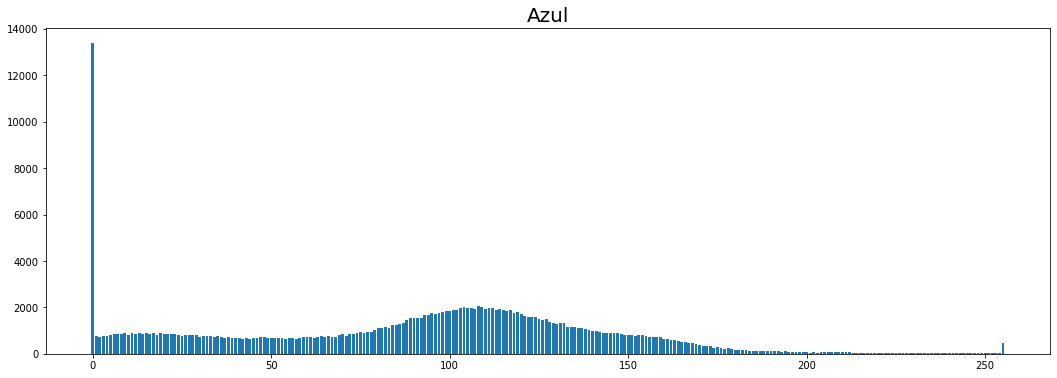

In [10]:
plot_image(im_array2b[:,:,2])
plot_histogram(im_array2b[:,:,2], title="Azul")

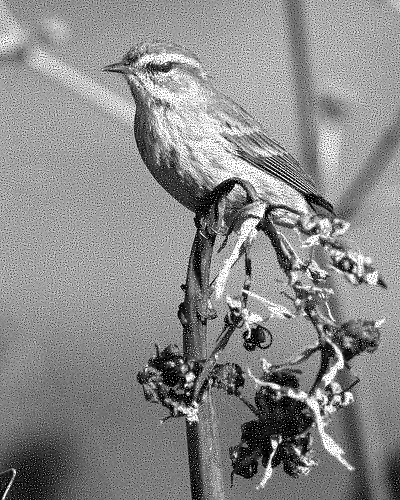

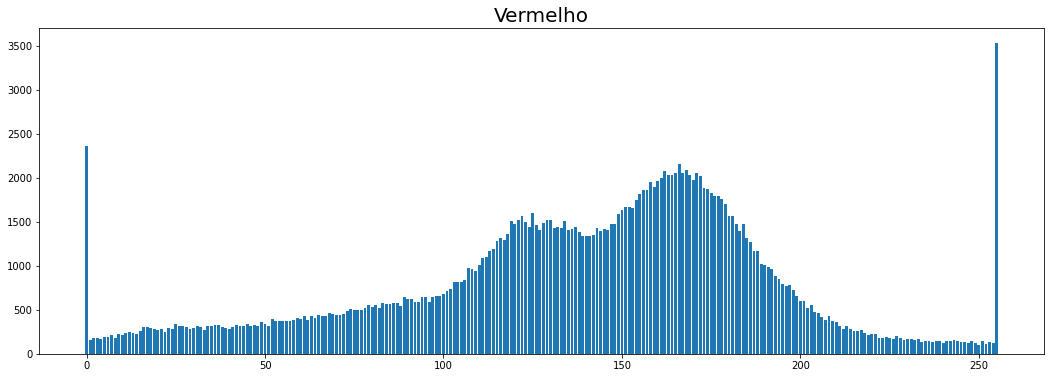

In [11]:
plot_image(im_array2b[:,:,0])
plot_histogram(im_array2b[:,:,0], title="Vermelho")

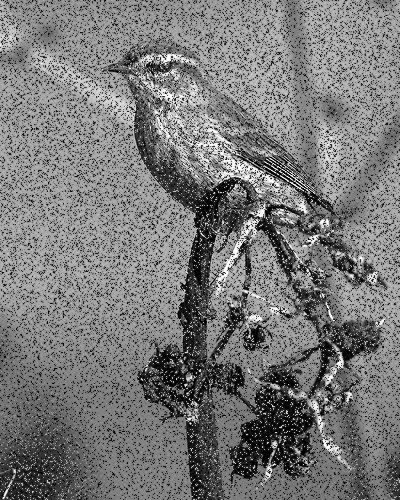

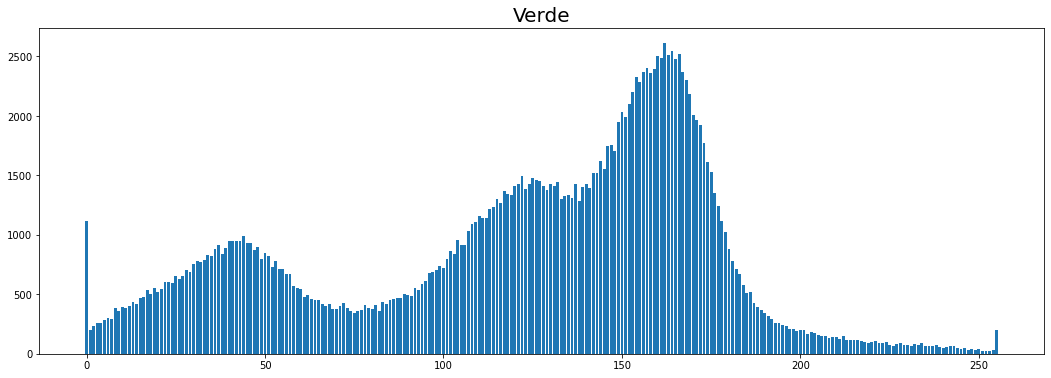

In [12]:
plot_image(im_array2b[:,:,1])
plot_histogram(im_array2b[:,:,1], title="Verde")

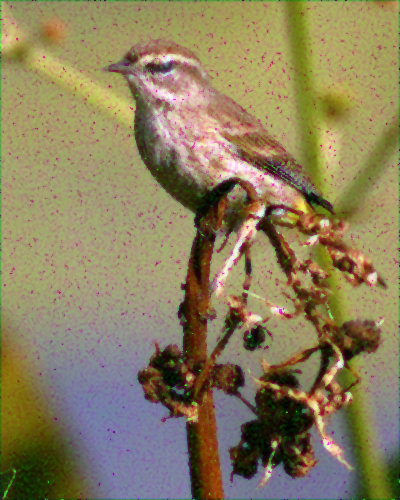

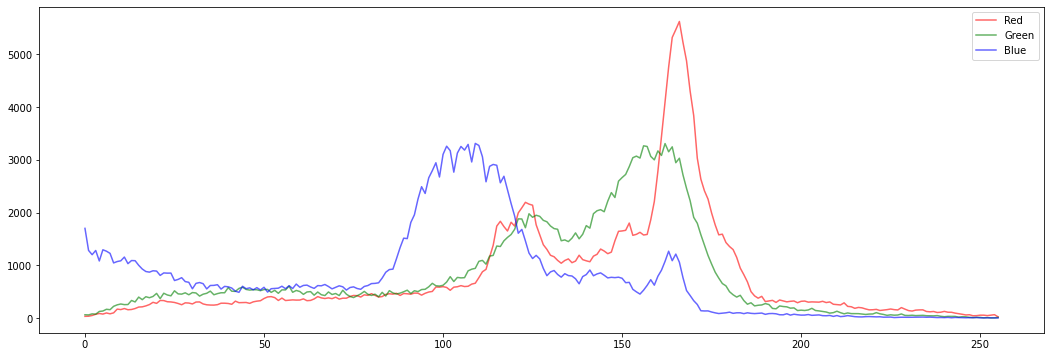

In [13]:
im_array2b_fix = np.empty(im_array2b.shape, dtype=np.uint8)

r_fix = median(im_array2b[:, :, 0], (7, 7))
r_fix = arith_mean(r_fix, (5, 5))
g_fix = median(im_array2b[:, :, 1], (3, 3))
b_fix = median(im_array2b[:, :, 2], (5, 5))
b_fix = contra_harm_mean(b_fix, (3, 3))
b_fix = arith_mean(b_fix, (3, 3))

im_array2b_fix[:, :, 0] = r_fix
im_array2b_fix[:, :, 1] = g_fix
im_array2b_fix[:, :, 2] = b_fix

plot_image(im_array2b_fix)
plot_histogram_rgb(im_array2b_fix)


## Colorir

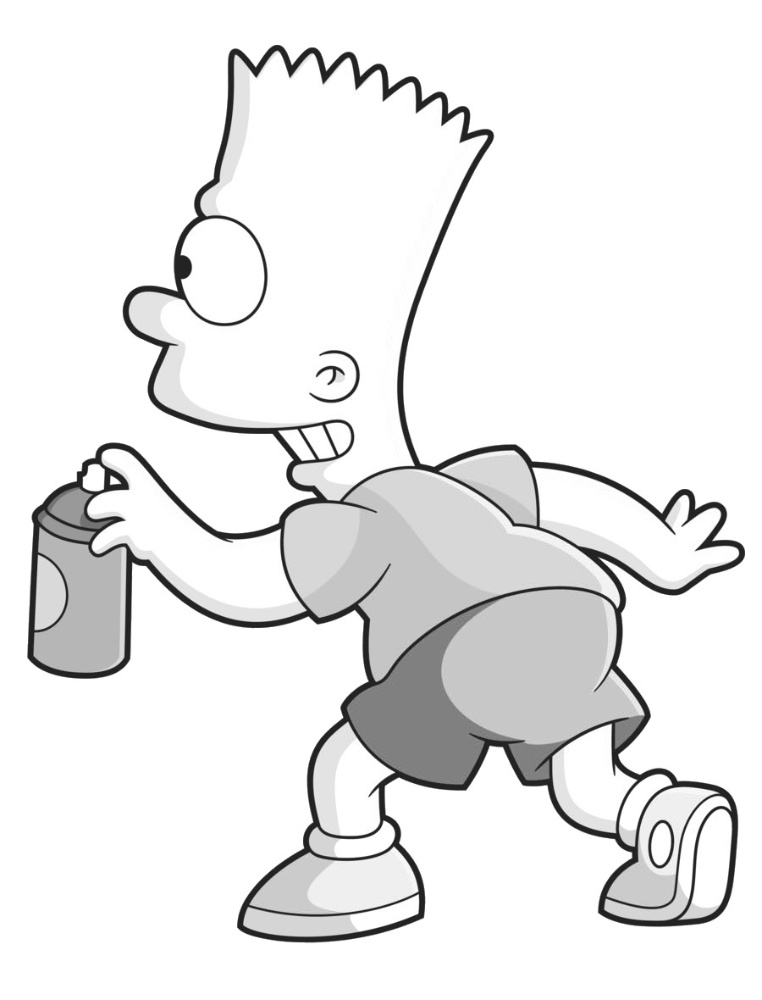

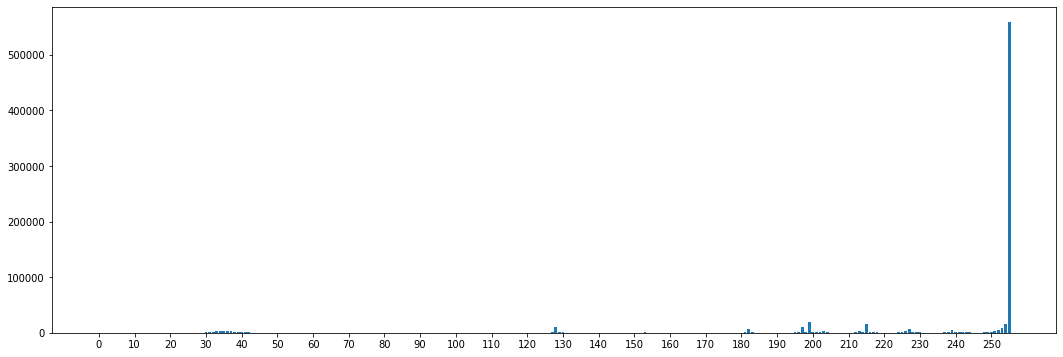

In [3]:
img3a, im_array3a = open_img("data/cores/Image_(3a).jpg")
display(img3a)
plot_histogram(im_array3a)

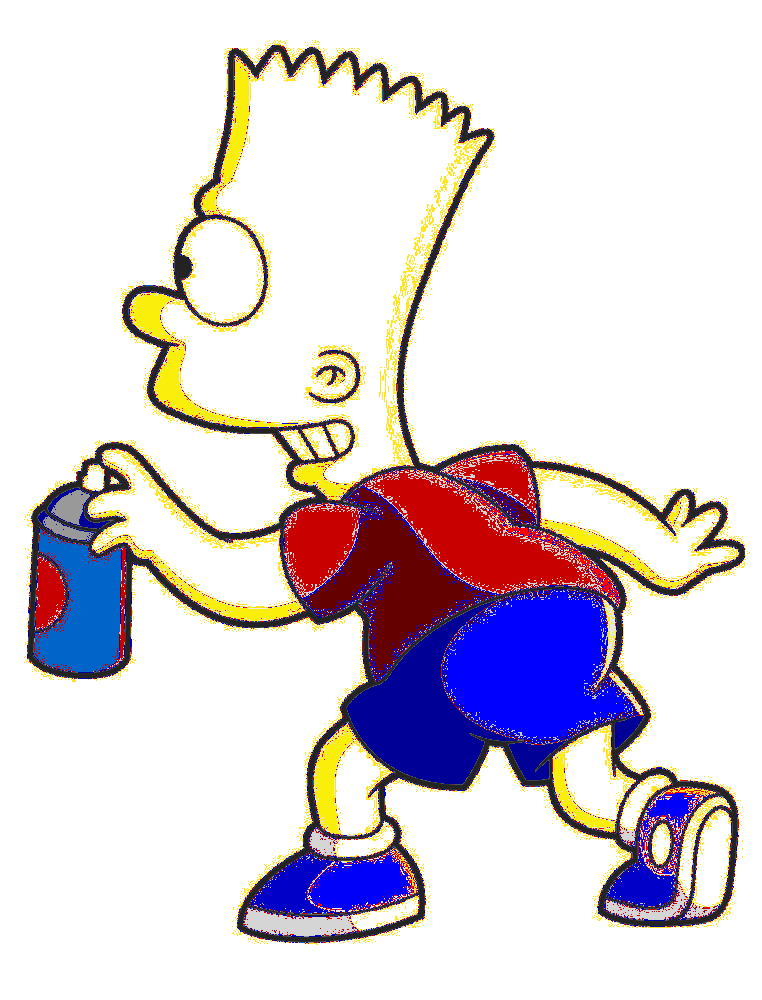

In [10]:
im_new = np.empty((im_array3a.shape[0],im_array3a.shape[1], 3), dtype=np.uint8)
im_borda = np.zeros(im_array3a.shape, dtype=np.uint8)

for y in range(im_array3a.shape[0]):
    for x in range(im_array3a.shape[1]):
        if 100 < im_array3a[y][x] < 150:
            im_new[y][x] = [0, 0, 150]
        elif 180 < im_array3a[y][x] < 190:
            im_new[y][x] = [0, 100, 200]
        elif 190 < im_array3a[y][x] < 200:
            if im_array3a[y][x] > 197:
                im_new[y][x] = [0, 0, 255]
            else:
                im_new[y][x] = [100, 0, 0]
        elif 215 <= im_array3a[y][x] < 220:
            im_new[y][x] = [200, 0, 0]
        elif 160 < im_array3a[y][x] < 190:
            im_new[y][x] = [200, 0, 0]
        elif 200 < im_array3a[y][x] < 210:
            im_new[y][x] = [0, 0, 200]
        elif 220 < im_array3a[y][x] < 224:
            im_new[y][x] = [255, 0, 0]
        elif 224 < im_array3a[y][x] < 230:
            im_new[y][x] = [249, 239, 11]
        elif 224 < im_array3a[y][x] < 230:
            im_new[y][x] = [249, 239, 11]
        elif 237 < im_array3a[y][x] < 241:
            im_new[y][x] = [0, 0, 250]
        elif 240 < im_array3a[y][x] < 246:
            im_new[y][x] = [255, 0, 0]
        elif 245 < im_array3a[y][x] < 254:
            im_new[y][x] = [255, 228, 30]
        else:
           im_new[y][x][:] = im_array3a[y][x]
        
plot_image(im_new)